In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Excel

In [2]:
# Load the dataset
df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.028872,-0.130254,1.102887e+09,244464000.0,-3.184231e+07,...,-170775.886453,-1059.042606,-4.739468,-1.027193,-3584.970569,-5.649112,70.667599,70.667599,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.016772,-0.034656,1.173640e+08,56797000.0,-1.968379e+06,...,-11502.243880,-168.146428,-1.410813,-1.207108,-222.196310,-1.681590,10.138780,10.138780,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.015297,-0.094878,3.961539e+09,638704000.0,-6.059927e+07,...,-324959.759255,-3804.051175,-17.024036,-3.689647,-6861.392776,-20.291452,253.836024,253.836024,-2470.054721,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.014625,NaN,1.565900e+08,NaN,-2.290124e+06,...,-12199.928822,-901.413470,-0.189720,-1.009642,-253.366805,-0.226133,-3.169102,-3.169102,-92.619013,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.006993,-0.050957,5.717172e+09,784560000.0,-3.997865e+07,...,-214438.078273,-4116.308632,-37.818819,-9.136488,-4606.916825,-45.077368,586.030400,586.030400,-1632.997165,0.033005


In [3]:
outlier_check = df.loc[:,["Environmental Intensity (Op Inc)","Environmental Intensity (Sales)"]].abs()
outlier_check

,Environmental Intensity (Op Inc),Environmental Intensity (Sales)
0,0.130254,0.028872
1,0.034656,0.016772
2,0.094878,0.015297
3,NaN,0.014625
4,0.050957,0.006993
...,...,...
14030,11.014730,0.213669
14031,6.618900,0.202556
14032,11.047016,0.196883
14033,79.945145,0.149515


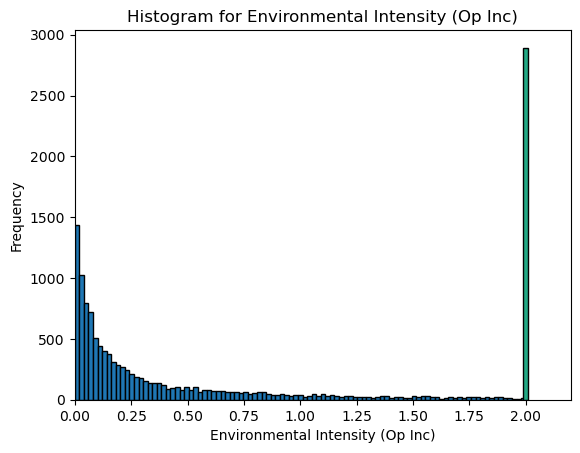

In [4]:
import numpy as np
import matplotlib.pyplot as plt

column_name = 'Environmental Intensity (Op Inc)'

threshold = 2

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 49 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title("Histogram for " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()


In [5]:
Q1 = outlier_check['Environmental Intensity (Op Inc)'].quantile(0.25)
Q3 = outlier_check['Environmental Intensity (Op Inc)'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers based on the IQR method
df_no_outliers = outlier_check[(outlier_check['Environmental Intensity (Op Inc)'] >= lower_bound) & (outlier_check['Environmental Intensity (Op Inc)'] <= upper_bound)]

filtered_df = df_no_outliers.copy()

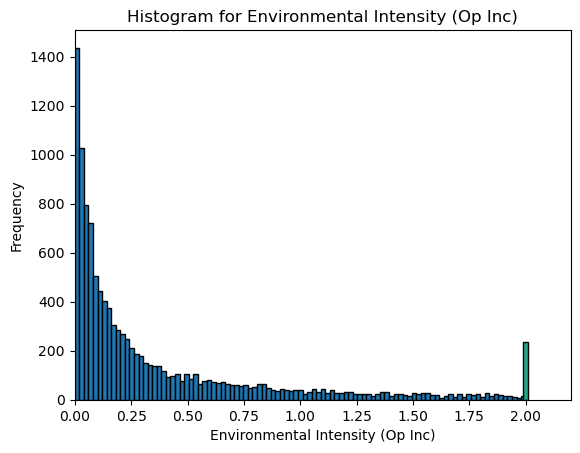

In [6]:
import numpy as np
import matplotlib.pyplot as plt

column_name = 'Environmental Intensity (Op Inc)'

threshold = 2

# Mask to determine values below and above threshold
below_threshold = filtered_df[column_name] <= threshold
above_threshold_count = len(filtered_df[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 49 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(filtered_df[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title("Histogram for " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()


#

In [7]:
filtered_df.shape

(11379, 2)

# Outlier Testing for Sales

In [8]:
# Load the dataset
df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.028872,-0.130254,1.102887e+09,2.444640e+08,-3.184231e+07,...,-1.707759e+05,-1059.042606,-4.739468,-1.027193,-3.584971e+03,-5.649112,7.066760e+01,7.066760e+01,-1297.277948,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.016772,-0.034656,1.173640e+08,5.679700e+07,-1.968379e+06,...,-1.150224e+04,-168.146428,-1.410813,-1.207108,-2.221963e+02,-1.681590,1.013878e+01,1.013878e+01,-79.398691,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.015297,-0.094878,3.961539e+09,6.387040e+08,-6.059927e+07,...,-3.249598e+05,-3804.051175,-17.024036,-3.689647,-6.861393e+03,-20.291452,2.538360e+02,2.538360e+02,-2470.054721,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.014625,NaN,1.565900e+08,NaN,-2.290124e+06,...,-1.219993e+04,-901.413470,-0.189720,-1.009642,-2.533668e+02,-0.226133,-3.169102e+00,-3.169102e+00,-92.619013,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.006993,-0.050957,5.717172e+09,7.845600e+08,-3.997865e+07,...,-2.144381e+05,-4116.308632,-37.818819,-9.136488,-4.606917e+03,-45.077368,5.860304e+02,5.860304e+02,-1632.997165,0.033005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14030,2015,ELECTRICITE DE FRANCE,FRANCE,Electric Utilities,Production of electricity nec,0.213669,11.014730,8.146698e+10,1.580333e+09,1.740694e+10,...,2.572819e+09,0.000000,96124.954000,0.004662,2.224834e+06,114569.174000,-1.420618e+06,-1.420618e+06,626183.148932,0.000007
14031,2016,ELECTRICITE DE FRANCE,FRANCE,Electric Utilities,Production of electricity nec,0.202556,6.618900,7.513576e+10,2.299353e+09,1.521919e+10,...,2.560983e+09,0.000000,62032.915000,0.004370,1.758319e+06,73932.865000,-9.167760e+05,-9.167760e+05,529412.728434,0.000008
14032,2017,ELECTRICITE DE FRANCE,FRANCE,Electric Utilities,Production of electricity nec,0.196883,-11.047016,8.361897e+10,-1.490280e+09,1.646314e+10,...,2.567779e+09,0.000000,65681.910000,0.004864,1.891416e+06,78281.210000,-9.707040e+05,-9.707040e+05,579678.891874,0.000008
14033,2018,ELECTRICITE DE FRANCE,FRANCE,Electric Utilities,Production of electricity nec,0.149515,79.945145,7.897046e+10,1.476918e+08,1.180724e+10,...,2.129512e+09,0.000000,47019.907000,0.004593,1.318617e+06,56036.417000,-6.949008e+05,-6.949008e+05,403734.351386,0.000011


In [9]:
outlier_check = df.loc[:,["Environmental Intensity (Op Inc)","Environmental Intensity (Sales)"]].abs()
outlier_check

,Environmental Intensity (Op Inc),Environmental Intensity (Sales)
0,0.130254,0.028872
1,0.034656,0.016772
2,0.094878,0.015297
3,NaN,0.014625
4,0.050957,0.006993
...,...,...
14030,11.014730,0.213669
14031,6.618900,0.202556
14032,11.047016,0.196883
14033,79.945145,0.149515


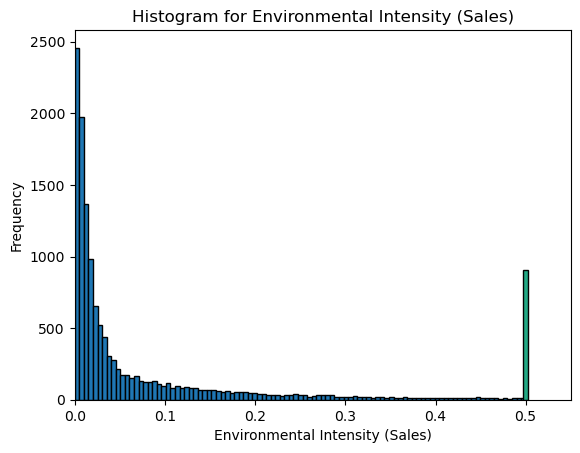

In [12]:
import numpy as np
import matplotlib.pyplot as plt

column_name = 'Environmental Intensity (Sales)'

threshold = 0.5

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 49 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title("Histogram for " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()


In [18]:
Q1 = outlier_check['Environmental Intensity (Sales)'].quantile(0.25)
Q3 = outlier_check['Environmental Intensity (Sales)'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

# Filter outliers based on the IQR method
df_no_outliers = outlier_check[(outlier_check['Environmental Intensity (Sales)'] >= lower_bound) & (outlier_check['Environmental Intensity (Sales)'] <= upper_bound)]

filtered_df = df_no_outliers.copy()

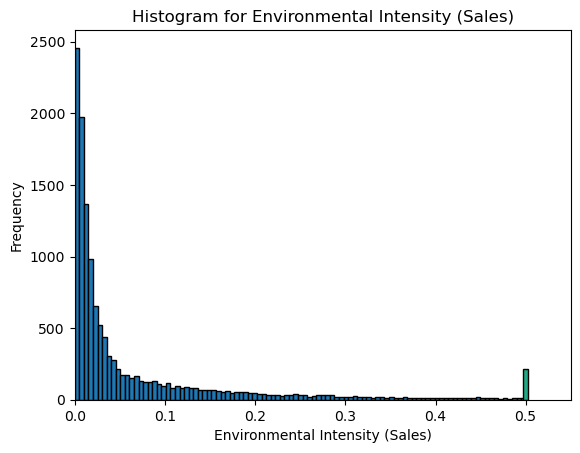

In [19]:
import numpy as np
import matplotlib.pyplot as plt

column_name = 'Environmental Intensity (Sales)'

threshold = 0.5

# Mask to determine values below and above threshold
below_threshold = filtered_df[column_name] <= threshold
above_threshold_count = len(filtered_df[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 49 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(filtered_df[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title("Histogram for " + column_name)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()


In [143]:
filtered_df.shape

(12823, 2)

## Filter for only the Brewery Category

In [ ]:
# Load the dataset
df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')
df.head()

In [39]:
brewery_df = df[df['Industry (Exiobase)'] == 'Manufacture of beverages']
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape
filtered_df

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
512,2019,VINA CONCHA Y TORO SA,CHILE,Manufacture of beverages,-1.904097,-15.676413,-1.663769e+09,-2.159405e+07,-4492.907726,-2.503619e+05,...,-11.124222,-168.381473,-1980.760402,-13.259289,-906.130132,-20293.446214,-802.369590,0.002986,8.737840e+08,1.061320e+08
513,2019,TREASURY WINE ESTATES LTD,AUSTRALIA,Manufacture of beverages,-0.183028,-0.841354,-3.705559e+08,-1.169200e+07,-3926.512660,-1.538223e+05,...,-112.746052,-25.902538,-1791.416209,-134.385352,1472.858556,1472.858556,-483.501945,0.013682,2.024587e+09,4.404280e+08
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.065962,-0.465228,-6.978419e+08,-2.950986e+08,-77656.206578,-3.917870e+06,...,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202,1.057940e+10,1.500000e+09
520,2019,COCA-COLA CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.045577,-0.161593,-1.698666e+09,-1.625522e+09,-407566.930077,-2.159479e+07,...,-3921.704025,-1151.941498,-197429.821324,-4674.394947,53466.251573,53466.251573,-67583.633864,0.101159,3.727000e+10,1.051200e+10
521,2019,ARCA CONTINENTAL SAB DE CV,MEXICO,Manufacture of beverages,-0.041959,-0.339790,-3.657751e+08,-1.485989e+08,-39669.796188,-1.964839e+06,...,-754.282061,-488.686394,-18212.177123,-899.051084,8151.555164,8150.318891,-5842.721539,0.122498,8.717459e+09,1.076474e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,2010,PERNOD RICARD SA,FRANCE,Manufacture of beverages,-0.019944,-0.078415,-1.894979e+08,-9.239250e+07,-29080.033285,-1.214192e+06,...,-634.236466,-146.331995,-13572.423546,-755.965191,8194.601335,8194.601335,-3833.905492,0.131334,9.501403e+09,2.416612e+09
13373,2010,KIRIN HOLDINGS CO LTD,JAPAN,Manufacture of beverages,-0.019710,-0.283115,-5.292861e+08,-5.037614e+08,-120417.958111,-6.702247e+06,...,-568.200650,-107.606420,-59377.364941,-677.255150,7619.713272,7619.713272,-20952.815851,0.006961,2.685426e+10,1.869512e+09
13376,2010,COCA-COLA HBC AG,SWITZERLAND,Manufacture of beverages,-0.013892,-0.137433,-1.078471e+08,-8.436855e+07,-83801.151986,-1.165615e+06,...,-4755.161770,-17.140502,-36266.053026,-5667.817870,70200.960702,70200.960702,-4400.324131,0.001471,7.762983e+09,7.847254e+08
13377,2010,DIAGEO PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Manufacture of beverages,-0.013575,-0.049116,-2.078887e+08,-1.830600e+08,-60840.448385,-2.400985e+06,...,-1257.339420,-157.176885,-28701.400867,-1498.660020,17541.180545,17541.180545,-7804.987354,0.016191,1.531450e+10,4.232627e+09


In [40]:
Q1 = filtered_df['Environmental Intensity (Op Inc)'].quantile(0.25)
Q3 = filtered_df['Environmental Intensity (Op Inc)'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers based on the IQR method
df_no_outliers = filtered_df[(filtered_df['Environmental Intensity (Op Inc)'] >= lower_bound) & (filtered_df['Environmental Intensity (Op Inc)'] <= upper_bound)]

filtered_df = df_no_outliers.copy()

In [41]:
filtered_df

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.065962,-0.465228,-6.978419e+08,-2.950986e+08,-77656.206578,-3.917870e+06,...,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202,1.057940e+10,1.500000e+09
520,2019,COCA-COLA CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.045577,-0.161593,-1.698666e+09,-1.625522e+09,-407566.930077,-2.159479e+07,...,-3921.704025,-1151.941498,-197429.821324,-4674.394947,53466.251573,53466.251573,-67583.633864,0.101159,3.727000e+10,1.051200e+10
521,2019,ARCA CONTINENTAL SAB DE CV,MEXICO,Manufacture of beverages,-0.041959,-0.339790,-3.657751e+08,-1.485989e+08,-39669.796188,-1.964839e+06,...,-754.282061,-488.686394,-18212.177123,-899.051084,8151.555164,8150.318891,-5842.721539,0.122498,8.717459e+09,1.076474e+09
522,2019,COCA-COLA AMATIL LTD,AUSTRALIA,Manufacture of beverages,-0.041681,-0.357420,-1.496322e+08,-5.413651e+07,-14601.594219,-7.170230e+05,...,-199.919870,-45.930052,-6996.092387,-238.290403,2611.654117,2611.654117,-2247.670760,0.055953,3.589972e+09,4.186460e+08
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Manufacture of beverages,-0.033887,-0.114930,-1.778566e+09,-1.561186e+09,-391750.191978,-2.104927e+07,...,-3914.291085,-325.789140,-190769.424529,-4665.559245,56659.806086,56659.806086,-64862.799133,0.080199,5.248464e+10,1.547524e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,2010,PERNOD RICARD SA,FRANCE,Manufacture of beverages,-0.019944,-0.078415,-1.894979e+08,-9.239250e+07,-29080.033285,-1.214192e+06,...,-634.236466,-146.331995,-13572.423546,-755.965191,8194.601335,8194.601335,-3833.905492,0.131334,9.501403e+09,2.416612e+09
13373,2010,KIRIN HOLDINGS CO LTD,JAPAN,Manufacture of beverages,-0.019710,-0.283115,-5.292861e+08,-5.037614e+08,-120417.958111,-6.702247e+06,...,-568.200650,-107.606420,-59377.364941,-677.255150,7619.713272,7619.713272,-20952.815851,0.006961,2.685426e+10,1.869512e+09
13376,2010,COCA-COLA HBC AG,SWITZERLAND,Manufacture of beverages,-0.013892,-0.137433,-1.078471e+08,-8.436855e+07,-83801.151986,-1.165615e+06,...,-4755.161770,-17.140502,-36266.053026,-5667.817870,70200.960702,70200.960702,-4400.324131,0.001471,7.762983e+09,7.847254e+08
13377,2010,DIAGEO PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Manufacture of beverages,-0.013575,-0.049116,-2.078887e+08,-1.830600e+08,-60840.448385,-2.400985e+06,...,-1257.339420,-157.176885,-28701.400867,-1498.660020,17541.180545,17541.180545,-7804.987354,0.016191,1.531450e+10,4.232627e+09


# Boxplots

## Absoulte Values

In [42]:
df_abs_box = filtered_df.melt(id_vars='Industry (Exiobase)', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_abs_box

,Industry (Exiobase),variable,value
0,Manufacture of beverages,Working Capacity,-2.950986e+08
1,Manufacture of beverages,Working Capacity,-1.625522e+09
2,Manufacture of beverages,Working Capacity,-1.485989e+08
3,Manufacture of beverages,Working Capacity,-5.413651e+07
4,Manufacture of beverages,Working Capacity,-1.561186e+09
...,...,...,...
1203,Manufacture of beverages,Wood Production Capacity,1.638920e+04
1204,Manufacture of beverages,Wood Production Capacity,1.523943e+04
1205,Manufacture of beverages,Wood Production Capacity,1.404019e+05
1206,Manufacture of beverages,Wood Production Capacity,3.508236e+04


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


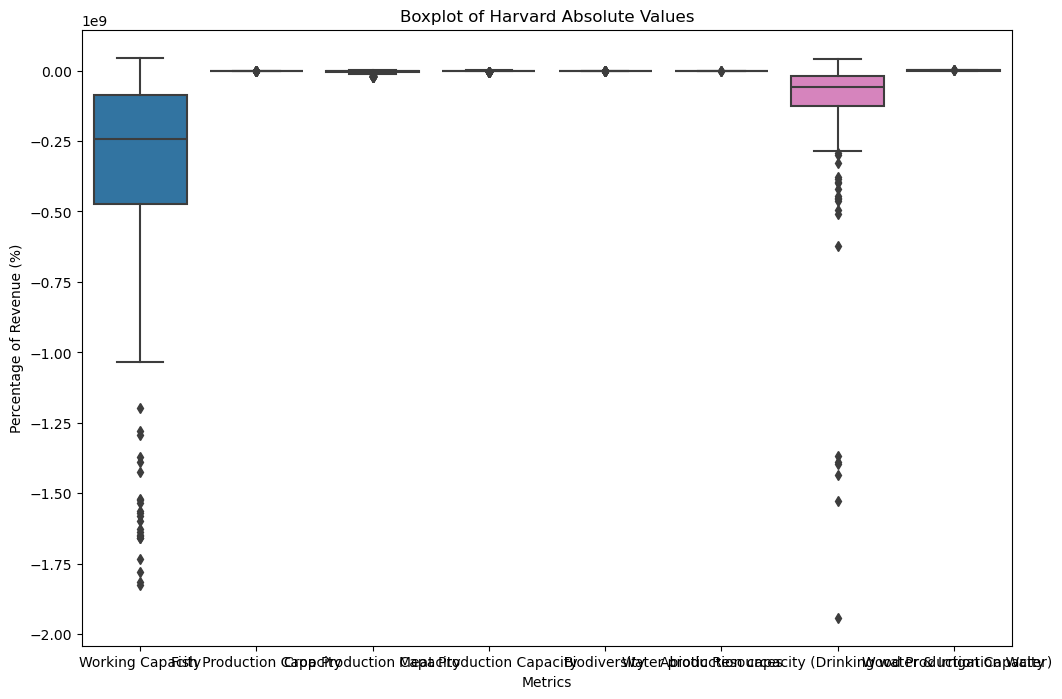

In [43]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_abs_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard Absolute Values')
plt.show()

## Percentage of Revenue

In [44]:
df_rev = filtered_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.065962,-0.465228,-6.978419e+08,-2.789370,-0.000734,-0.037033,...,-0.000011,-3.090801e-06,-0.000350,-0.000013,0.000143,0.000143,-0.000116,0.059202,1.057940e+10,1.500000e+09
520,2019,COCA-COLA CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.045577,-0.161593,-1.698666e+09,-4.361476,-0.001094,-0.057941,...,-0.000011,-3.090801e-06,-0.000530,-0.000013,0.000143,0.000143,-0.000181,0.101159,3.727000e+10,1.051200e+10
521,2019,ARCA CONTINENTAL SAB DE CV,MEXICO,Manufacture of beverages,-0.041959,-0.339790,-3.657751e+08,-1.704613,-0.000455,-0.022539,...,-0.000009,-5.605835e-06,-0.000209,-0.000010,0.000094,0.000093,-0.000067,0.122498,8.717459e+09,1.076474e+09
522,2019,COCA-COLA AMATIL LTD,AUSTRALIA,Manufacture of beverages,-0.041681,-0.357420,-1.496322e+08,-1.507993,-0.000407,-0.019973,...,-0.000006,-1.279399e-06,-0.000195,-0.000007,0.000073,0.000073,-0.000063,0.055953,3.589972e+09,4.186460e+08
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Manufacture of beverages,-0.033887,-0.114930,-1.778566e+09,-2.974557,-0.000746,-0.040106,...,-0.000007,-6.207324e-07,-0.000363,-0.000009,0.000108,0.000108,-0.000124,0.080199,5.248464e+10,1.547524e+10


In [45]:
df_rev_box = df_rev.melt(id_vars='Industry (Exiobase)', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_rev_box

,Industry (Exiobase),variable,value
0,Manufacture of beverages,Working Capacity,-2.789370
1,Manufacture of beverages,Working Capacity,-4.361476
2,Manufacture of beverages,Working Capacity,-1.704613
3,Manufacture of beverages,Working Capacity,-1.507993
4,Manufacture of beverages,Working Capacity,-2.974557
...,...,...,...
1203,Manufacture of beverages,Wood Production Capacity,0.000172
1204,Manufacture of beverages,Wood Production Capacity,0.000057
1205,Manufacture of beverages,Wood Production Capacity,0.001809
1206,Manufacture of beverages,Wood Production Capacity,0.000229


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


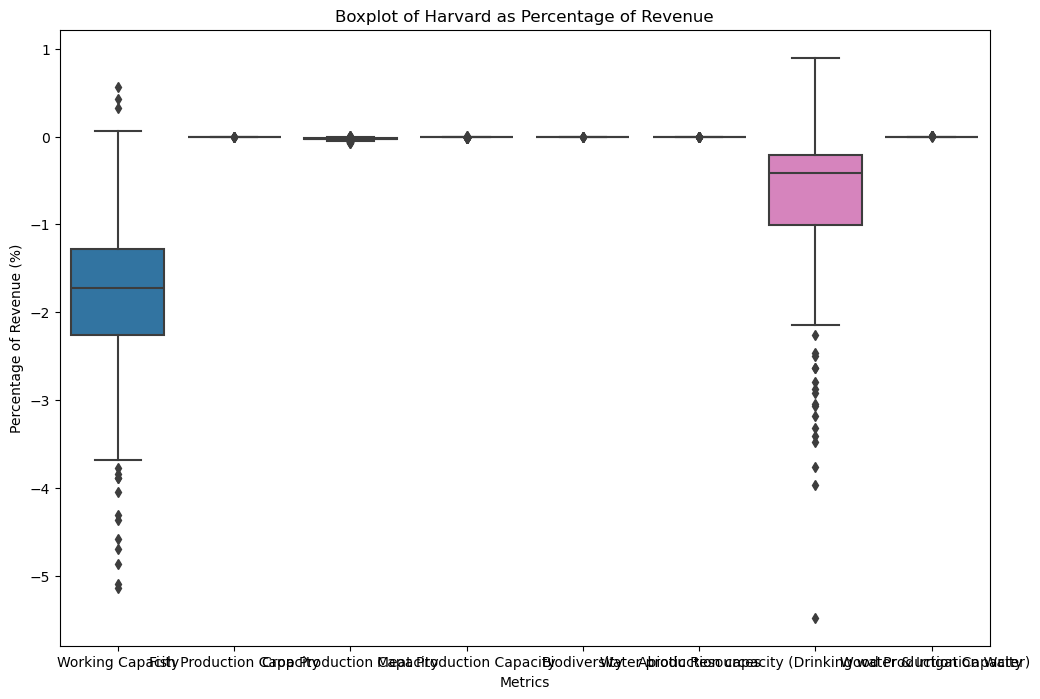

In [46]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_rev_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard as Percentage of Revenue')
plt.show()

## Percentage of Op Income

In [47]:
df_opinc = filtered_df.copy()
for column in df_opinc.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_opinc[column] = (df_opinc[column] / df_opinc['Operating Income'])*100
df_opinc.head()

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.065962,-0.465228,-6.978419e+08,-19.673242,-0.005177,-0.261191,...,-0.000074,-0.000022,-0.002468,-0.000088,0.001012,0.001012,-0.000817,0.059202,1.057940e+10,1.500000e+09
520,2019,COCA-COLA CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.045577,-0.161593,-1.698666e+09,-15.463490,-0.003877,-0.205430,...,-0.000037,-0.000011,-0.001878,-0.000044,0.000509,0.000509,-0.000643,0.101159,3.727000e+10,1.051200e+10
521,2019,ARCA CONTINENTAL SAB DE CV,MEXICO,Manufacture of beverages,-0.041959,-0.339790,-3.657751e+08,-13.804227,-0.003685,-0.182525,...,-0.000070,-0.000045,-0.001692,-0.000084,0.000757,0.000757,-0.000543,0.122498,8.717459e+09,1.076474e+09
522,2019,COCA-COLA AMATIL LTD,AUSTRALIA,Manufacture of beverages,-0.041681,-0.357420,-1.496322e+08,-12.931333,-0.003488,-0.171272,...,-0.000048,-0.000011,-0.001671,-0.000057,0.000624,0.000624,-0.000537,0.055953,3.589972e+09,4.186460e+08
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Manufacture of beverages,-0.033887,-0.114930,-1.778566e+09,-10.088280,-0.002531,-0.136019,...,-0.000025,-0.000002,-0.001233,-0.000030,0.000366,0.000366,-0.000419,0.080199,5.248464e+10,1.547524e+10


In [48]:
df_opinc_box = df_opinc.melt(id_vars='Industry (Exiobase)', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_opinc_box

,Industry (Exiobase),variable,value
0,Manufacture of beverages,Working Capacity,-19.673242
1,Manufacture of beverages,Working Capacity,-15.463490
2,Manufacture of beverages,Working Capacity,-13.804227
3,Manufacture of beverages,Working Capacity,-12.931333
4,Manufacture of beverages,Working Capacity,-10.088280
...,...,...,...
1203,Manufacture of beverages,Wood Production Capacity,0.000678
1204,Manufacture of beverages,Wood Production Capacity,0.000815
1205,Manufacture of beverages,Wood Production Capacity,0.017892
1206,Manufacture of beverages,Wood Production Capacity,0.000829


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


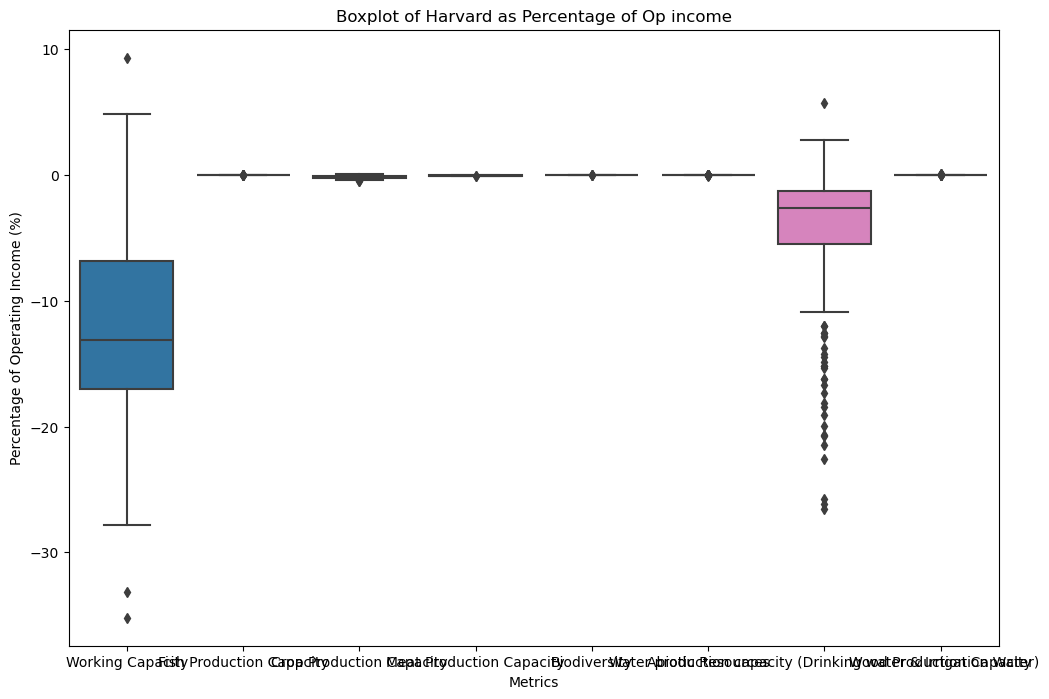

In [49]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

## On Total Environmental Cost

In [50]:
df_cost = filtered_df.copy()
for column in df_cost.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_cost[column] = (df_cost[column] / df_cost['Total Environmental Cost']) * 100
df_cost.head()

,Year,Company Name,Country,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.065962,-0.465228,-6.978419e+08,42.287318,0.011128,0.561427,...,0.000160,0.000047,0.005306,0.000190,-0.002175,-0.002175,0.001757,0.059202,1.057940e+10,1.500000e+09
520,2019,COCA-COLA CO,UNITED STATES OF AMERICA,Manufacture of beverages,-0.045577,-0.161593,-1.698666e+09,95.694020,0.023993,1.271279,...,0.000231,0.000068,0.011623,0.000275,-0.003148,-0.003148,0.003979,0.101159,3.727000e+10,1.051200e+10
521,2019,ARCA CONTINENTAL SAB DE CV,MEXICO,Manufacture of beverages,-0.041959,-0.339790,-3.657751e+08,40.625764,0.010845,0.537171,...,0.000206,0.000134,0.004979,0.000246,-0.002229,-0.002228,0.001597,0.122498,8.717459e+09,1.076474e+09
522,2019,COCA-COLA AMATIL LTD,AUSTRALIA,Manufacture of beverages,-0.041681,-0.357420,-1.496322e+08,36.179708,0.009758,0.479190,...,0.000134,0.000031,0.004676,0.000159,-0.001745,-0.001745,0.001502,0.055953,3.589972e+09,4.186460e+08
523,2019,ANHEUSER-BUSCH INBEV,BELGIUM,Manufacture of beverages,-0.033887,-0.114930,-1.778566e+09,87.777779,0.022026,1.183497,...,0.000220,0.000018,0.010726,0.000262,-0.003186,-0.003186,0.003647,0.080199,5.248464e+10,1.547524e+10


In [51]:
df_melted = df_cost.melt(id_vars='Industry (Exiobase)', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_melted

,Industry (Exiobase),variable,value
0,Manufacture of beverages,Working Capacity,42.287318
1,Manufacture of beverages,Working Capacity,95.694020
2,Manufacture of beverages,Working Capacity,40.625764
3,Manufacture of beverages,Working Capacity,36.179708
4,Manufacture of beverages,Working Capacity,87.777779
...,...,...,...
1203,Manufacture of beverages,Wood Production Capacity,-0.008649
1204,Manufacture of beverages,Wood Production Capacity,-0.002879
1205,Manufacture of beverages,Wood Production Capacity,-0.130186
1206,Manufacture of beverages,Wood Production Capacity,-0.016876


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


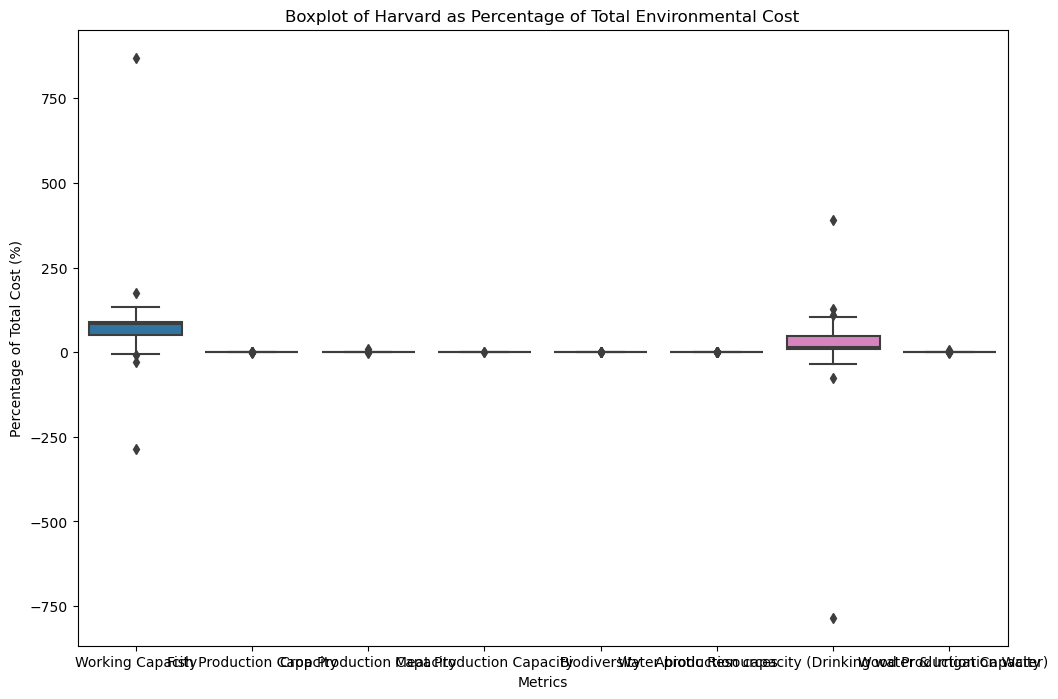

In [52]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Total Cost (%)')
plt.title('Boxplot of Harvard as Percentage of Total Environmental Cost')
plt.show()

## On SDGs

In [53]:
df_opinc_box = df_opinc.melt(id_vars='Industry (Exiobase)', value_vars=df_opinc.loc[:,"SDG 1.5":"SDG 15.5"])
df_opinc_box

,Industry (Exiobase),variable,value
0,Manufacture of beverages,SDG 1.5,-8.748568
1,Manufacture of beverages,SDG 1.5,-6.892748
2,Manufacture of beverages,SDG 1.5,-5.705866
3,Manufacture of beverages,SDG 1.5,-5.725235
4,Manufacture of beverages,SDG 1.5,-4.501238
...,...,...,...
2562,Manufacture of beverages,SDG 15.5,-0.000159
2563,Manufacture of beverages,SDG 15.5,-0.001121
2564,Manufacture of beverages,SDG 15.5,-0.000561
2565,Manufacture of beverages,SDG 15.5,-0.000184


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


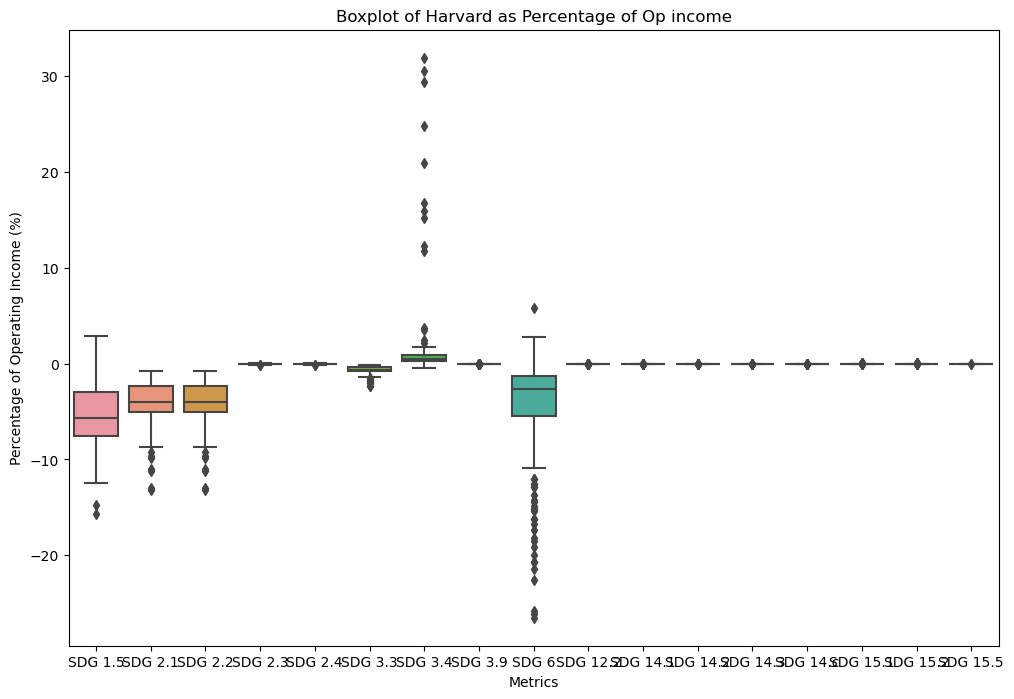

In [54]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

# Further Analysis here